In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import pathlib
import cv2
import os
from zipfile import ZipFile
import imutils
import tensorflow
from sklearn.model_selection import train_test_split
import PIL
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import random
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log
from tensorflow.keras.layers import Input,ZeroPadding2D,Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Concatenate, UpSampling2D, Conv2D, Reshape, Activation, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import legacy
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## PART A
#### DOMAIN:
Entertainment

#### CONTEXT:
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie
and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and
multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved

#### DATA DESCRIPTION:
The dataset comprises of images and its mask for corresponding human face.

#### PROJECT OBJECTIVE:
 To build a face detection system.

#### Q1. Import and Understand the data [7 Marks]

A. Import and read ‘images.npy’. [1 Marks]

B. Split the data into Features(X) & labels(Y). Unify shape of all the images. [3 Marks]

Imp Note: Replace all the pixels within masked area with 1.

Hint: X will comprise of array of image whereas Y will comprise of coordinates of the mask(human face). Observe: data[0], data[0][0], data[0][1].

C. Split the data into train and test[400:9]. [1 Marks]

D. Select random image from the train data and display original image and masked image. [2 Marks]

In [76]:
# PartA: Q1 A: Import and read ‘images.npy’
img_array = np.load('/content/drive/My Drive/ColabNotebooks/Images.npy',allow_pickle= True)
print(img_array.shape)

(393, 2)


array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)
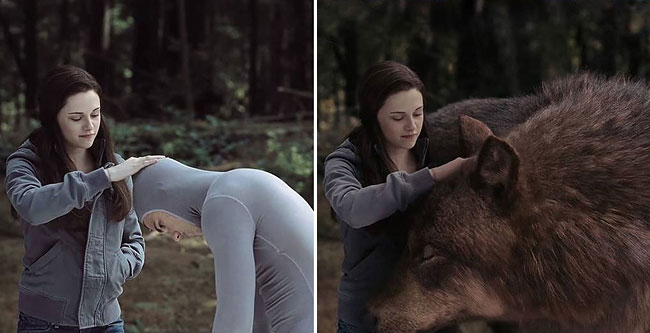

In [77]:
img_array[0][0]

In [7]:
img_array[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [78]:
#PartA: Q1 B: Split the data into Features(X) & labels(Y). Unify shape of all the images.
# Defining the image size
width = 224
height = 224

In [79]:
# Splitting the data to Features & Labels
Y = np.zeros((int(img_array.shape[0]), height, width))
X = np.zeros((int(img_array.shape[0]), height, width, 3))

for index in range(img_array.shape[0]):
    img = img_array[index][0]
    img = cv2.resize(img, (height, width), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in img_array[index][1]:
        x1 = int(i["points"][0]['x'] * width)
        x2 = int(i["points"][1]['x'] * width)
        y1 = int(i["points"][0]['y'] * height)
        y2 = int(i["points"][1]['y'] * height)
        Y[index][y1:y2, x1:x2] = 1

In [80]:
X.shape

(393, 224, 224, 3)

In [81]:
Y.shape

(393, 224, 224)

In [82]:
#PartA: Q1 C:Split the data into train and test[400:9]. Actually the dataset we recieved had 393 rows only, hence splitting 385 rows as train & rest 8 as test
X_train = X[:385:]
X_test = X[385::]
Y_train = Y[:385:]
Y_test = Y[385::]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(385, 224, 224, 3)
(8, 224, 224, 3)
(385, 224, 224)
(8, 224, 224)


The random index choosen is: 112


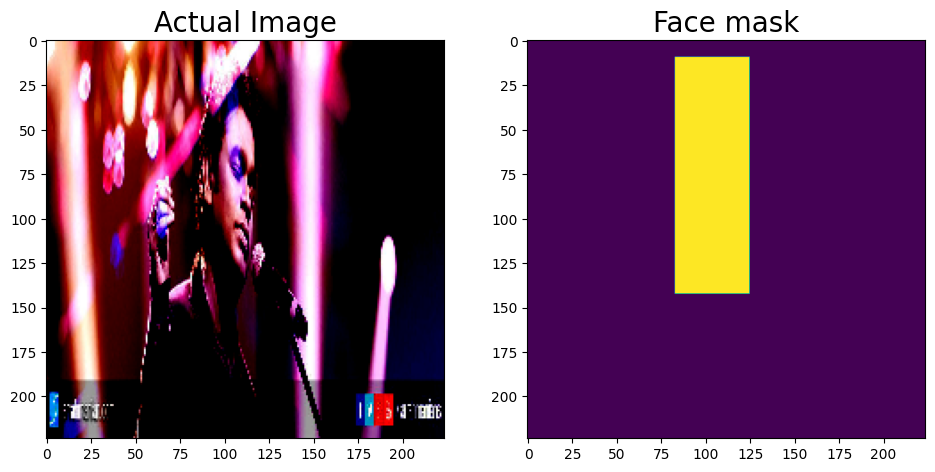

In [84]:
#PartA: Q1 D: Select random image from the train data and display original image and masked image.
import random
random_index = random.randint(0, min(len(X_train), len(Y_train)) - 1)
print('The random index choosen is:', random_index)
plt.figure(figsize=(30,30))

plt.subplot(5,5,1)
plt.title("Actual Image",fontsize=20)
plt.imshow(X_train[random_index])

plt.subplot(5,5,1+1)
plt.title("Face mask",fontsize=20)
plt.imshow(Y_train[random_index]);

#### Q2. Model building [11 Marks]

A. Design a face mask detection model. [4 Marks]

Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.

Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

B. Design your own Dice Coefficient and Loss function. [2 Marks]

C. Train and tune the model as required. [3 Marks]

D. Evaluate and share insights on performance of the model. [2 Marks]

In [85]:
#PartA: Q2 A: Design a face mask detection model
# from tensorflow.keras.applications.mobilenet_v2 import MobileNet
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

IMAGE_HEIGHT =  IMAGE_WIDTH = 224
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)

In [86]:
model = create_model()
model.summary()

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)         128       ['conv1[0][0]']               
 on)                                                                                              
                                                                 

In [87]:
#PartA: Q2 B: Design your own Dice Coefficient and Loss function
#Dice coefficient
def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

In [88]:
#Loss function
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [89]:
#PartA: Q2 C:  Train and tune the model as required
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [91]:
model.fit(X_train, Y_train, epochs=10, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/10
385/385 [==============================] - ETA: 0s - loss: 1.2237 - dice_coefficient: 0.5090
Epoch 1: loss improved from inf to 1.22368, saving model to model-1.22.h5
385/385 [==============================] - 29s 43ms/step - loss: 1.2237 - dice_coefficient: 0.5090 - lr: 0.0010
Epoch 2/10
384/385 [============================>.] - ETA: 0s - loss: 0.8215 - dice_coefficient: 0.6097
Epoch 2: loss improved from 1.22368 to 0.82046, saving model to model-0.82.h5
385/385 [==============================] - 16s 42ms/step - loss: 0.8205 - dice_coefficient: 0.6100 - lr: 0.0010
Epoch 3/10
384/385 [============================>.] - ETA: 0s - loss: 0.7275 - dice_coefficient: 0.6500
Epoch 3: loss improved from 0.82046 to 0.72866, saving model to model-0.73.h5
385/385 [==============================] - 16s 42ms/step - loss: 0.7287 - dice_coefficient: 0.6492 - lr: 0.0010
Epoch 4/10
385/385 [==============================] - ETA: 0s - loss: 0.6586 - dice_coefficient: 0.6739
Epoch 4: loss impr

In [92]:
#PartA: Q2 D:  Evaluate and share insights on performance of the model.
model.evaluate(X_test, Y_test)

1/1 [==============================] - 2s 2s/step - loss: 1.0216 - dice_coefficient: 0.5449


[1.0215873718261719, 0.5449396967887878]

The dice coefficient in training data is 0.78 which means it did a decent job with training data and have good overlap between mask & image but in test data dice coefficient is 0.54 which is not very good. Similarly, Loss function in training data is quite less than the test data.
We can definetely improve the performance of the model by modifying the hyperparameters.

1/1 [==============================] - 1s 943ms/step


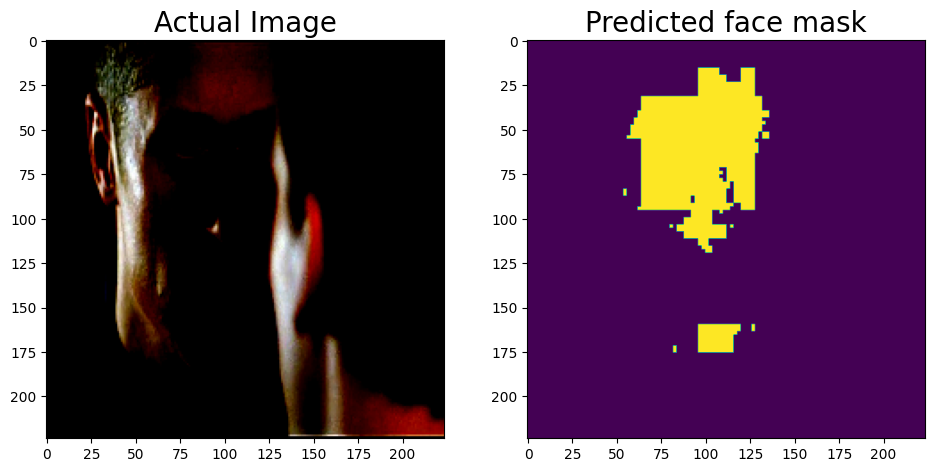

In [23]:
#PartA: Q3:  Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image.
pred= X_test[3]
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)


image_0 = cv2.resize(pred, dsize=(height, width), interpolation=cv2.INTER_CUBIC)
plt.title("Actual Image",fontsize=20)
plt.imshow(image_0)


pred_mask = cv2.resize(1.0*(model.predict(x=np.array([pred]))[0] > 0.2), (width,height))
plt.subplot(5,5,1+1)
plt.title("Predicted face mask",fontsize=20)
plt.imshow(pred_mask, alpha=1);



## PART B
#### DOMAIN:
Entertainment

#### CONTEXT:
Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the

#### DATA DESCRIPTION:
The dataset comprises of of face images

#### PROJECT OBJECTIVE:
 To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

#### 1. Read/import images from folder ‘training_images’. [2 Marks]

#### 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images. [3 Marks]

#### Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source.

#### 3. From the same loop above, extract metadata of the faces and write into a DataFrame. [3 Marks]

#### 4. Save the output Dataframe in .csv format. [2 Marks]

In [25]:
#Import packages
from imutils import paths
#import face_recognition


In [26]:
#PartB: Q 1: Read/import images from folder ‘training_images’.
#Extracting the images & labels from the folder training_images

image_paths= []  #List of images
labels = []  #List of labels

# Define the path having folder with images
image = imutils.paths.list_images("/content/drive/MyDrive/ColabNotebooks/training_images")

for path in image:
   image_path = cv2.imread(path)
   #Resizing images to 128 *128 & appending to the list
   image_paths.append(cv2.resize(image_path,(128,128)))


for path in os.listdir("/content/drive/MyDrive/ColabNotebooks/training_images"):
  labels.append(path)


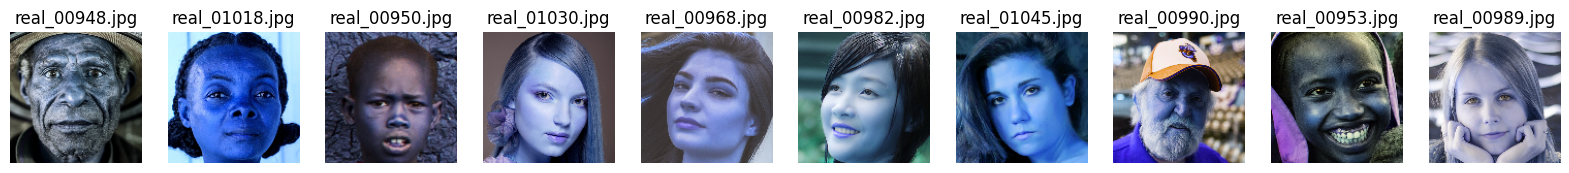

In [27]:
#Visualize few of the images
n= range(10)
plt.figure(figsize=(20, 20))

for i, j in enumerate(n):
    plt.subplot(1, len(n), i+1)
    plt.imshow(image_paths[j], cmap="gray")
    plt.title("{}".format(labels[j]))
    plt.axis('off')

plt.show()

In [28]:
#PartB: Q 2: Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.
#PartB: Q 3: From the same loop above, extract metadata of the faces and write into a DataFrame.

#Using pretrained clssifier from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Dataframe to store metadata
metadata= pd.DataFrame(columns= ['x','y','w','h','Total_Faces','Image_Name'])

#Iterating through all the images in the list
for image_data in image_paths:

    # Detect faces
    faces = face_cascade.detectMultiScale(image_data, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    #Storing the metadata, CascadeClassifier-DetectMultiScale method returns boundary rectangles for the detected faces (i.e., x, y, w, h) and not x1,y1,x2,y2
    for i in range(len(faces)):
      x= faces[0][0]
      y= faces[0][1]
      w= faces[0][2]
      h= faces[0][3]

      metadata.loc[len(metadata)] = [x,y,w,h,len(faces),labels[i]]

In [ ]:
metadata.head()

,x,y,w,h,Total_Faces,Image_Name
0,11,4,100,100,1,real_00948.jpg
1,21,24,99,99,1,real_00948.jpg
2,30,38,81,81,1,real_00948.jpg
3,34,36,79,79,1,real_00948.jpg
4,8,16,99,99,1,real_00948.jpg


In [ ]:
#PartB: Q 4: Save the output Dataframe in .csv format
metadata.to_csv('metadata.csv')


## PART C
#### DOMAIN:
Face Recognition

#### CONTEXT:
Company X intends to build a face identification model to recognise human faces.

#### DATA DESCRIPTION:
The dataset comprises of images and its mask where there is a human face.

#### PROJECT OBJECTIVE:
Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

#### 1. Unzip, read and Load data(‘PINS.zip’) into session. [2 Marks]

#### 2. Write function to create metadata of the image. [4 Marks]

Hint: Metadata means derived information from the available data which can be useful for particular problem statement.

#### 3.  Write a loop to iterate through each and every image and create metadata for all the images. [4 Marks]

#### 4. Generate Embeddings vectors on the each face in the dataset. [4 Marks]

Hint: Use ‘vgg_face_weights.h5’

#### 5. Build distance metrics for identifying the distance between two similar and dissimilar images. [4 Marks]

#### 6. Use PCA for dimensionality reduction. [2 Marks]

#### 7. Build an SVM classifier in order to map each image to its right person. [4 Marks]

#### 8. Import and display the the test images. [2 Marks]

Hint: ‘Benedict Cumberbatch9.jpg’ and ‘Dwayne Johnson4.jpg’ are the test images.
#### 9. Use the trained SVM model to predict the face on both test images. [4 Marks]

In [29]:
#PartC: Q 1: Unzip, read and Load data(‘PINS.zip’) into session
# Extract zip file
with ZipFile("/content/drive/MyDrive/ColabNotebooks/PINS.zip", 'r') as zip:
  zip.extractall()

In [30]:
#Load data
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

In [31]:
#PartC: Q 2: Write function to create metadata of the image
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [32]:
#PartC: Q 3: Write a loop to iterate through each and every image and create metadata for all the images.
def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata),exts

In [33]:
metadata, exts = load_metadata('PINS')
labels = np.array([meta.name for meta in metadata])

In [34]:
n = np.random.randint(1, len(metadata))
img_path = metadata[n].image_path()
img = load_image(img_path)

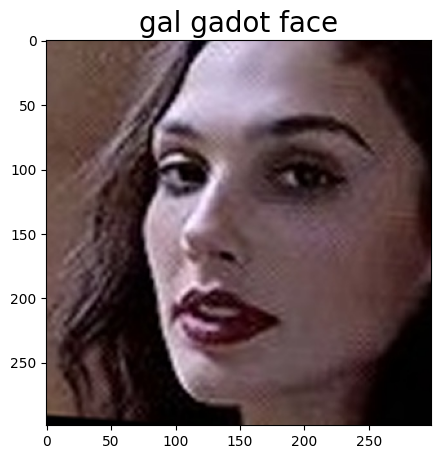

In [35]:
# View sample image
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
title = labels[n].split('_')[1]
ax.set_title(title, fontsize = 20)
plt.imshow(img);

In [36]:
#PartC: Q 4:Generate Embeddings vectors on the each face in the dataset.
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape = (224, 224, 3)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides =(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Convolution2D(4096, (7, 7), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))

    return model

In [37]:
model = vgg_face()
model.load_weights('/content/drive/MyDrive/ColabNotebooks/vgg_face_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

In [38]:
vgg_face_descriptor = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output)

In [39]:
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalizing pixel values from [0-255] to [0-1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224, 224))
print("The shape of the image is {}".format(img.shape))

# Obtain and get the embedding vector for the above image using vgg_face_descriptor model
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
print("The shape of the Embedded vector is {}".format(embedding_vector.shape))

The shape of the image is (224, 224, 3)
1/1 [==============================] - 4s 4s/step
The shape of the Embedded vector is (2622,)


In [40]:
# Generate embeddings
embdngs = []
embdngs = np.zeros((metadata.shape[0], 2622))
for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image/255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embdngs[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embdngs[i] = np.zeros(2622)

0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [41]:
#PartC: Q 5: Build distance metrics for identifying the distance between two similar and dissimilar images
# Defining distance metric
def dist(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

Plot images and get distance between the pairs given below¶

2, 3 and 2, 180

30, 31 and 30, 100

70, 72 and 70, 115

In [42]:
def show_pair(idx1, idx2):
    plt.figure(figsize = (8, 3))
    plt.suptitle(f'Distance = {dist(embdngs[idx1], embdngs[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))

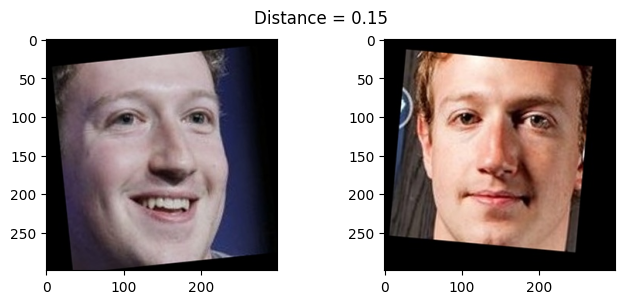

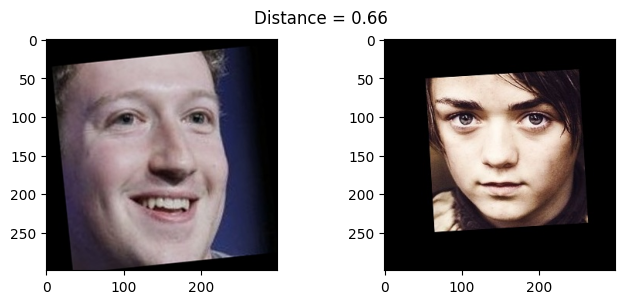

In [43]:
# Display images and distance between them
show_pair(2, 3)
show_pair(2, 180)

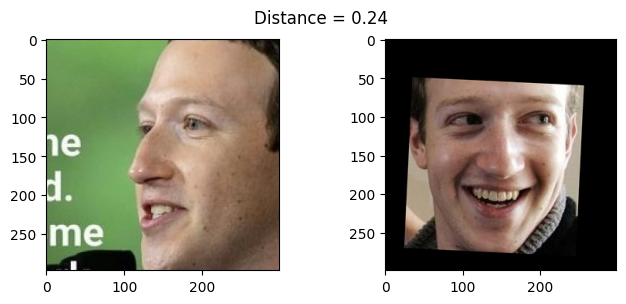

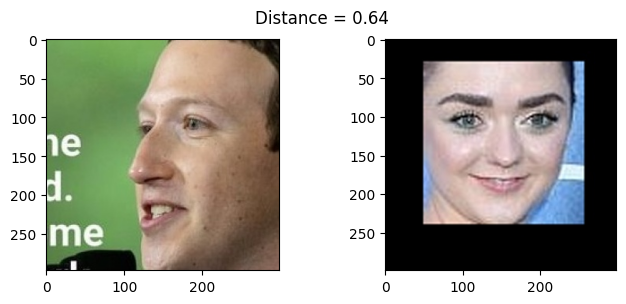

In [44]:
show_pair(30,31)
show_pair(30,100)

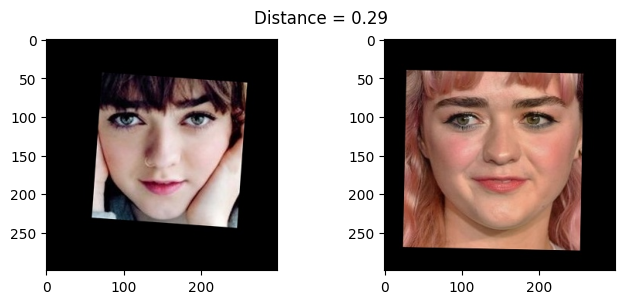

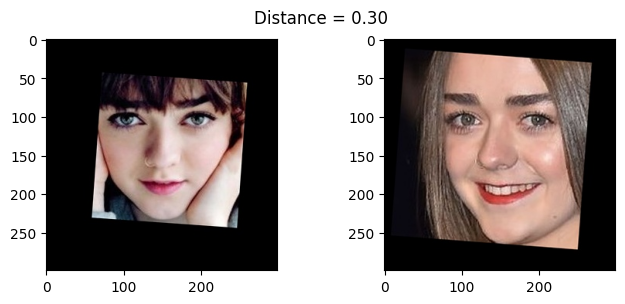

In [45]:
show_pair(70,72)
show_pair(70,115)

In [46]:
#PartC: Q 6: Use PCA for dimensionality reduction
# Splitting the data into train and test
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# Features
X_train = np.array(embdngs)[train_idx]
X_test = np.array(embdngs)[test_idx]

# Labels
y_train = np.array([meta.name for meta in metadata[train_idx]])
y_test = np.array([meta.name for meta in metadata[test_idx]])

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622) (1197, 2622) (9573,) (1197,)


In [47]:
# Label encoding
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.transform(y_test)

In [48]:
# Standarizing features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [49]:
# Covariance matrix
cvar_mat = np.cov(X_train_sc.T)
print("Shape of Covariance Matrix:",cvar_mat.shape)

# Finding Eigen values and Eigen vectors
eigen_vals, eigen_vecs = np.linalg.eig(cvar_mat)

# Finding variance explained in percentage
tot = sum(eigen_vals)

# Individual explained variance
var_exp = [(i /tot) * 100 for i in sorted(eigen_vals, reverse = True)]

# Cumulative explained variance
cvar_exp = np.cumsum(var_exp)

print('Explained Cumulative Variance is ', cvar_exp)

Shape of Covariance Matrix: (2622, 2622)
Explained Cumulative Variance is  [ 13.63180561  19.00460966  22.99529659 ...  99.99999983  99.99999999
 100.        ]


In [50]:
# Get index where cumulative variance explained is > threshold
thresh = 95
res = list(filter(lambda i: i > thresh, cvar_exp))[0]
index = (cvar_exp.tolist().index(res))
print(f'Index of element just greater than {thresh}: {str(index)}')

Index of element just greater than 95: 346


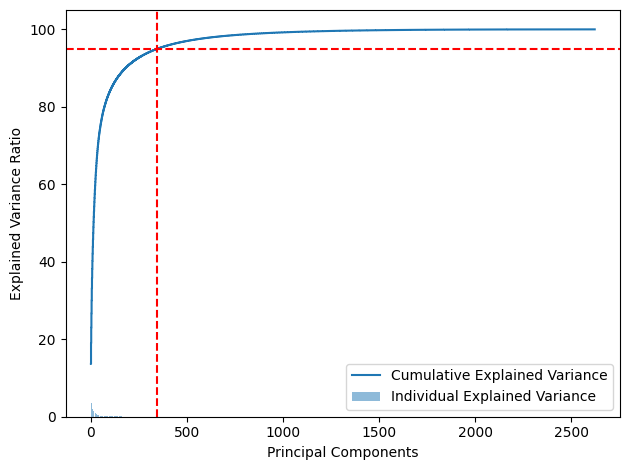

In [51]:
# Plotting explained variance
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual Explained Variance')
plt.step(range(1, eigen_vals.size + 1), cvar_exp, where = 'mid', label = 'Cumulative Explained Variance')
plt.axhline(y = thresh, color = 'r', linestyle = '--')
plt.axvline(x = index, color = 'r', linestyle = '--')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [52]:
# Reducing the dimensions
pca = PCA(n_components = index, random_state = 7, svd_solver = 'full', whiten = True)
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
print("Shape of dimensionally reduced data {}, {}".format(X_train_pca.shape, X_test_pca.shape))

Shape of dimensionally reduced data (9573, 346), (1197, 346)


In [53]:
#PartC: Q 7: Build an SVM classifier in order to map each image to its right person.
svc = SVC(C = 1, gamma = 0.001, kernel = 'rbf', class_weight = 'balanced', random_state = 7)
svc.fit(X_train_pca, y_train)
print('SVC accuracy for train dataset is: {0:.2f}'.format(svc.score(X_train_pca, y_train)))

SVC accuracy for train dataset is: 0.99


In [54]:
# Predict
y_pred = svc.predict(X_test_pca)

# Accuracy Score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9640768588137009


In [55]:
# Classification Report for each person
names = [name.split('_')[1].title().strip() for name in labels]
print('Classification Report: \n{}'.format(classification_report(y_test, y_pred, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      0.90      0.95        10
      Alexandra Daddario       0.83      1.00      0.91        10
            Alvaro Morte       0.93      1.00      0.96        13
Alycia Debnam Carey Face       1.00      1.00      1.00        13
             Amanda Crew       1.00      1.00      1.00         7
          Amaury Nolasco       1.00      0.89      0.94         9
        Amber Heard Face       1.00      1.00      1.00         8
               Anna Gunn       1.00      0.93      0.96        14
           Anne Hathaway       1.00      1.00      1.00        14
     Barbara Palvin Face       1.00      0.89      0.94         9
      Bellamy Blake Face       0.93      0.93      0.93        14
    Benedict Cumberbatch       0.92      1.00      0.96        12
            Betsy Brandt       1.00      1.00      1.00         9
              Bill Gates       0.69      1.00      

In [56]:
 #PartC: Q 8: Import and display the the test images
# Create meta data
class t_IdentityMetadata():
    def __init__(self, base, name, file):
#         print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.t_image_path()

    def t_image_path(self):
        return os.path.join(self.base, self.name, self.file)

def t_load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(t_IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata), exts

metadata, exts = t_load_metadata('/content/drive/MyDrive/ColabNotebooks/Test Images-Part C')
labels = np.array([meta.name for meta in metadata])

In [57]:
# Load images
def t_load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

In [ ]:
# n = np.random.randint(1, len(metadata))
# img_path = metadata[n].t_image_path()
# img = t_load_image(img_path)

In [58]:
img_path0 = metadata[0].t_image_path()
img0 = t_load_image(img_path0)
img_path1 = metadata[1].t_image_path()
img1 = t_load_image(img_path1)

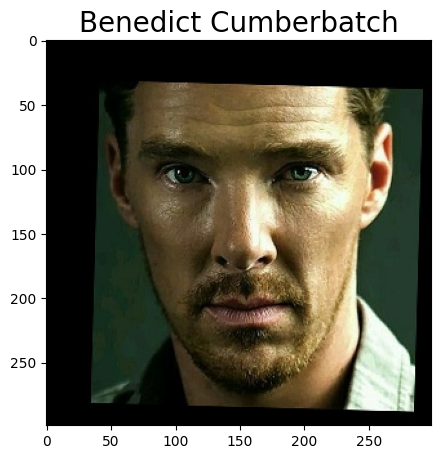

In [59]:
# View test image
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
title = labels[0]
ax.set_title(title, fontsize = 20)
plt.imshow(img0)

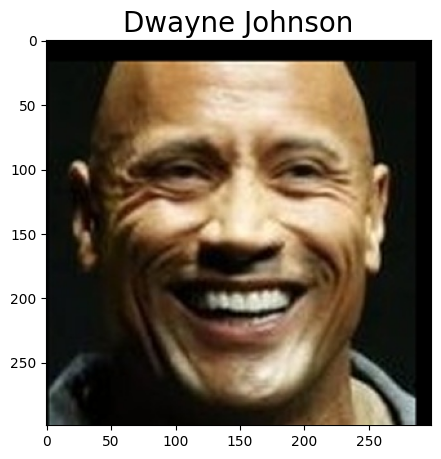

In [60]:
# View another test image
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
title = labels[1]
ax.set_title(title, fontsize = 20)
plt.imshow(img1)

In [61]:
#PartC: Q 9: Use the trained SVM model to predict the face on both test images.
t1_idx = np.arange(metadata.shape[0]) % 9 == 0
t2_idx = np.arange(metadata.shape[0]) % 9 == 1

In [70]:
metadata[t2_idx][0].name

'Dwayne Johnson'

In [71]:
def sample_img_plot(sample_idx):
  # Load image for sample_idx from test data
  sample_img = t_load_image(metadata[t1_idx][sample_idx].t_image_path())
  # Get actual name
  actual_name = metadata[t1_idx][sample_idx].name.split('_')[-1].title().strip()
  # Normalizing pixel values
  sample_img = (sample_img/255.).astype(np.float32)
  # Resize
  sample_img = cv2.resize(sample_img, (224, 224))

  # Obtain embedding vector for sample image
  embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis = 0))[0]
  # Scaled the vector and reshape
  embedding_scaled = sc.transform(embedding.reshape(1, -1))
  # Predict
  sample_pred = svc.predict(pca.transform(embedding_scaled))
  # Transform back
  pred_name = enc.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()
  return sample_img, actual_name, pred_name

1/1 [==============================] - 0s 24ms/step


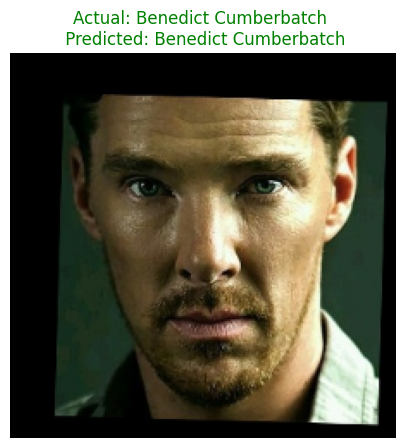

In [72]:
# Plot for images in test data
sample_img, actual_name, pred_name = sample_img_plot(0)
fig = plt.figure(figsize = (10, 5))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"Actual: {actual_name} \n Predicted: {pred_name}", color = 'green' if actual_name == pred_name else 'red')
plt.show()

1/1 [==============================] - 0s 40ms/step


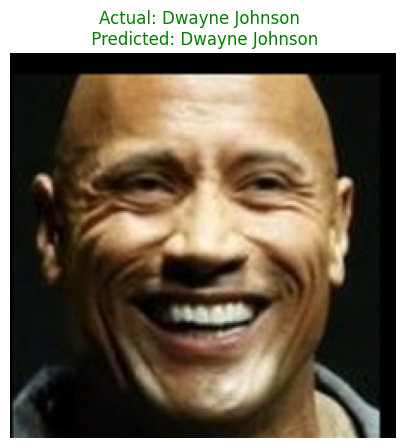

In [74]:
# Another test image
def sample_img_plot(sample_idx):
  # Load image for sample_idx from test data
  sample_img = t_load_image(metadata[t2_idx][sample_idx].t_image_path())
  # Get actual name
  actual_name = metadata[t2_idx][sample_idx].name.split('_')[-1].title().strip()
  # Normalizing pixel values
  sample_img = (sample_img/255.).astype(np.float32)
  # Resize
  sample_img = cv2.resize(sample_img, (224, 224))

  # Obtain embedding vector for sample image
  embedding = vgg_face_descriptor.predict(np.expand_dims(sample_img, axis = 0))[0]
  # Scaled the vector and reshape
  embedding_scaled = sc.transform(embedding.reshape(1, -1))
  # Predict
  sample_pred = svc.predict(pca.transform(embedding_scaled))
  # Transform back
  pred_name = enc.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()
  return sample_img, actual_name, pred_name

sample_img, actual_name, pred_name = sample_img_plot(0)
fig = plt.figure(figsize = (10, 5))
plt.axis('off')
plt.imshow(sample_img)
plt.title(f"Actual: {actual_name} \n Predicted: {pred_name}", color = 'green' if actual_name == pred_name else 'red')
plt.show()